In [30]:
import pandas as pd

df_swing = pd.read_csv('2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


## Starting with sklearn iris data

<class 'dict_keys'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,) ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


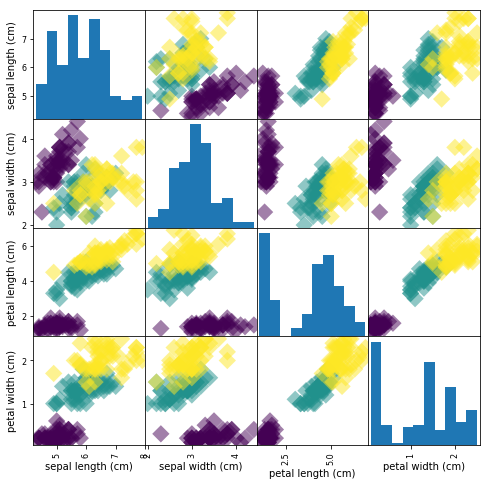

In [31]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(type(iris.keys()), type(iris.data), type(iris.target))

print(iris.data.shape, iris.target.shape, iris.target_names)
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')
df.head()

In [32]:
## K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Prediction {}'.format(y_pred))
print (iris['target_names'][y_pred])

print('score: {}'.format(knn.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#Grid search cross-validation
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.cv_results_)


Prediction [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]
['virginica' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor']
score: 0.9555555555555556
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.93      0.93        15
          2       0.93      0.93      0.93        15

avg / total       0.96      0.96      0.96        45

{'n_neighbors': 6}
{'mean_fit_time': array([0.

## Linear Regression

In [33]:
import numpy as np
slope, intercept = np.polyfit(df_swing.total_votes, df_swing.dem_share, 1)
print(slope, intercept)

4.037071700946557e-05 40.11391196864175


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    BLACK  LSTAT  MEDV  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  


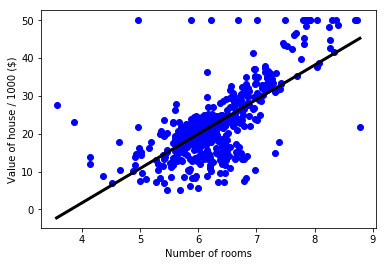

[[9.10210898]] [-34.67062078]
0.4835254559913343


In [34]:
import numpy as np
import pandas as pd
from sklearn import linear_model

boston = pd.read_csv('boston.csv', index_col=0)
boston.columns = boston.columns.str.upper()
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values #df_swing.dem_share

print(boston.head())
X_rooms = X[:,5] #df_swing.total_votes#
X_rooms = X_rooms.reshape(-1,1)

y = y.reshape(-1,1)

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)

plt.scatter(X_rooms, y, color='blue')
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.plot(prediction_space, reg.predict(prediction_space),
        color='black', linewidth=3)
plt.show()

print(reg.coef_, reg.intercept_)

#The coefficient R^2 is defined as (1 - u/v), 
#where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()
print(reg.score(X_rooms, y))

### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()
cv_result = cross_val_score(reg, X, y, cv = 5)

print(cv_result)
print(np.mean(cv_result))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958822


### Regularization

* Recall: Linear regression minimizes a loss function 
* It chooses a coefficient for each feature variable 
* Large coefficients can lead to overfitting 
* Penalizing large coefficients: Regularization

#### Ridge regression
* Loss fuction = OLS loss function + alpha * sigma a^2
* Picking alpha here is similar to picking k in k-NN
* Hyperparameter tuning (More in Chapter 3)
* Alpha controls model complexity
    * Alpha = 0: We get back OLS (Can lead to overfi ing) 
    * Very high alpha: Can lead to underfi ing


#### Lasso regression for feature selection
* Loss fuction = OLS loss function + alpha * sigma abs(a)
* Can be used to select important features of a dataset
* Shrinks the coefficients of less important features to exactly 0

#### Elastic Net
* Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. 
* There is another type of regularized regression known as the elastic net. 
* In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:  
$a * L1 + b * L2$

Ridge: 0.6996938275127318
Lasso: 0.5950229535328551


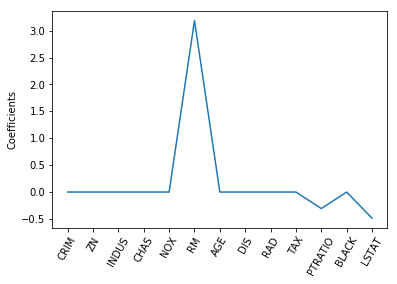

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.001}
Tuned ElasticNet R squared: 0.6632758699838588
Tuned ElasticNet MSE: 25.09035727989961


/Users/simba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned ElasticNet l1 ratio: 1.0
Tuned ElasticNet R squared: 0.6748582731460069
Tuned ElasticNet MSE: 24.227316566172906


In [51]:
#Ridge
#alpha: Hyperparameter, Alpha controls model complexity
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("Ridge: {}".format(ridge.score(X_test, y_test)))

#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
print("Lasso: {}".format(lasso.score(X_test, y_test)))

names = boston.drop('MEDV', axis=1).columns
_ = plt.plot(range(len(names)),lasso.coef_)
plt.xticks(range(len(names)),names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

#ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

l1_space = np.linspace(0.001,1,100)
param_grid = {'l1_ratio':l1_space}

elastic_Net = ElasticNet(max_iter=10000)
EN_cv = GridSearchCV(elastic_Net, param_grid, cv=5)
EN_cv.fit(X_train, y_train)
y_pred = EN_cv.predict(X_test)
r2 = EN_cv.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)
print("Tuned ElasticNet l1 ratio: {}".format(EN_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

from sklearn.linear_model import ElasticNetCV

elastic_NetCV = ElasticNetCV(l1_space)
elastic_NetCV.fit(X_train, y_train)

y_pred = elastic_NetCV.predict(X_test)
r2 = elastic_NetCV.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)
print("Tuned ElasticNet l1 ratio: {}".format(elastic_NetCV.l1_ratio_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))

from sklearn.model_selection import GridSearchCV
import numpy as np

c_space = np.logspace(-5,8,15)
param_grid = {'C':c_space}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

C = logreg_cv.best_params_['C']
logreg = LogisticRegression(C=C)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))

[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.9555555555555556
0.9666666666666667
[[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]


### ROC Curve & AUC

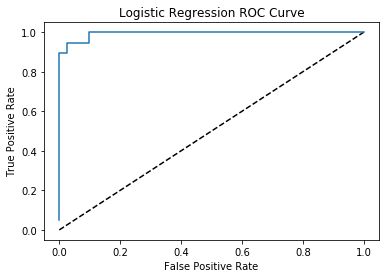

AUC: 0.9935815147625161
[0.935 0.94  0.745 0.52  0.575]


In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = logreg.predict_proba(X_test)[:,1]

iris_test1 = [1 if y_test[i]==1 else 0 for i in range(len(y_test))]
fpr, tpr, threshold = roc_curve(iris_test1, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print('AUC: {}'.format(roc_auc_score(iris_test1, y_pred_prob)))

iris_only1 = [1 if iris.target[i]==1 else 0 for i in range(len(iris.target))]
cv_scores = cross_val_score(logreg, iris.data, iris_only1, cv = 5, scoring='roc_auc')
print(cv_scores)

### Decision Tree

In [21]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1).values
y = df.Outcome.values

param_dist = {'max_depth':[3,None],
             'max_features':randint(1,9),
             'min_samples_leaf':randint(1,9),
             'criterion':['gini','entropy']}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.7447916666666666


### Dummy Variables

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


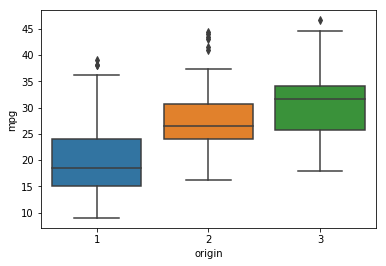

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('mpg.csv')

enc = OneHotEncoder(categorical_features = 'origin')
enc.fit()

sns.boxplot(x = 'origin', y = 'mpg', data = df)
plt.show()

In [58]:
df_origin = pd.get_dummies(df,'origin')
df_origin

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,origin_100,origin_102,origin_103,...,origin_volvo 145e (sw),origin_volvo 244dl,origin_volvo 245,origin_volvo 264gl,origin_volvo diesel,origin_vw dasher (diesel),origin_vw pickup,origin_vw rabbit,origin_vw rabbit c (diesel),origin_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,8,429.0,4341,10.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14.0,8,454.0,4354,9.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,14.0,8,440.0,4312,8.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14.0,8,455.0,4425,10.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15.0,8,390.0,3850,8.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
